<a href="https://colab.research.google.com/github/rashmi05pathak/CS6910_Assignment1/blob/main/EE20S051_CS21M050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#****PLease mount the drive according to your PRML folder location
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
import numpy as np

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
#Searching classes 0 to 9 from trainy
list_of_index = {}
for i in range(60000):
    if(list_of_index.get(trainy[i]) != True):
      list_of_index[trainy[i]] = i #class item train[i] found at index i  
 #CLass 0 to 9 is stored in the list_of_index dictionary 

In [ ]:
list_of_index

{0: 1,
 1: 59996,
 2: 59993,
 3: 59997,
 4: 59990,
 5: 59999,
 6: 59988,
 7: 59992,
 8: 59994,
 9: 59978}

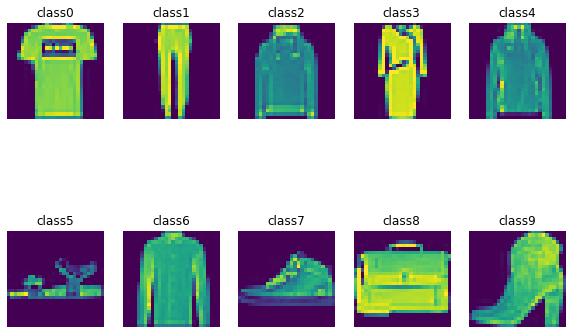

In [ ]:
#Q1. Plotting fashion Mnist Dataset
# create figure
fig = pyplot.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 5
for i in range(10):
	# Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, i+1)
    j = list_of_index.get(i)
    # showing image
    pyplot.imshow(trainX[j])
    pyplot.axis('off')
    pyplot.title("class"+ str(i))
# show the figure
pyplot.show()

In [ ]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 784, 1))
testX = testX.reshape((testX.shape[0], 784, 1))

In [ ]:
trainX[0].shape

(784, 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.max(0.0,x)

def softmax(arr):
    length = len(arr)
    s  = np.zeros(length)
    sum = 0
    for i in range(length):
        sum = sum + np.exp(arr[i])      #Correction-double addition step
    for i in range(length):
        s[i] = np.exp(arr[i])/sum
    return s
    
def layer_size(trainX,trainY):
    n_x = trainX[0].shape[0]
    n_y = len(np.unique(ytrain))
    return n_x,n_y

#implement mean squared error as output is real number
def mean_squared_error(y_true,y_pred):
    length = y_pred.shape[0]
    sum_error = 0
    for i in range(length):
        sum_error = sum_error + ((y_pred[i] - y_true[i])**2)
    return sum_error/length

def cross_entropy(p,q):
    length = q.shape[0]
    sum_error = 0
    for i in range(length):     #Can be optimized.
        sum_error = sum_error - (p * np.log(q))
    return sum_error

In [ ]:
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def der_tanh(x):
    return 1-np.tanh(x)**2

def der_relu(x):
    return (x>0)*1

In [ ]:
#Initialize the model’s parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that output matches
    length = len(n_h)
    W = []
    b = []
    #Weight and bias  784 * 4 * 5 * 10
    W.append(np.random.randn(n_h[0],n_x) * 0.01)
    b.append(np.zeros((n_h[0],1)))
    for i in range(0,length-1):
        W.append(np.random.randn(n_h[i+1],n_h[i]) * 0.01)
        b.append(np.zeros((n_h[i+1],1)))
    W.append(np.random.randn(n_y,n_h[length-1])* 0.01)
    b.append(np.zeros((n_y,1))) 
    parameters_w = {i: W[i] for i in range(len(W))}
    parameters_b = {i: b[i] for i in range(len(b))}
    print(len(parameters_w))
    print(parameters_b)
    return parameters_w,parameters_b

In [ ]:
def forward_propagation(X, parameters_w,parameters_b,activation_fun): 
    # Retrieve each parameter from the dictionary "parameters" 
    # Implement Forward Propagation to calculate A2
    length = len(parameters_w)
    A = []
    H = []
    A.append(np.dot(parameters_w[0],X)+parameters_b[0])
    if activation_fun == "sigmoid":
       H.append(sigmoid(A[0]))
    elif activation_fun == "relu":
       H.append(relu(A[0]))
    elif activation_fun == "tanh":
       H.append(tanh(A[0]))
    for i in range(1,length-1):
       A.append(np.dot(parameters_w[i],H[i-1])+parameters_b[i])
       H.append(sigmoid(A[i]))
    A.append(np.dot(parameters_w[length-1],H[length-2])+parameters_b[length-1])
    H.append(softmax(A[length-1]))
    cache = [A,H]
    return H[length-1],cache

In [ ]:
#****Neural Network method***********#
def nn_model(X, Y, n_h, epoch,learning_rate,opt_fun,activation_fun): 
    np.random.seed(3)
    n_x,n_y = layer_size(X,Y)
    parameters_w,parameters_b = initialize_parameters(n_x, n_h, n_y) 
    #print(parameters_w)
    # Loop (gradient descent)
    for i in range(0, epoch):
        for x,y in zip(X,Y):
            A2, cache = forward_propagation(x, parameters_w,parameters_b,activation_fun)
            # grads_w,grads_b = backward_propagation(parameters_w, cache, x, y,activation_fun) #parameters NOT defined.
            # Gradient descent parameter update.
            for i in range(len(parameters_w)):
                 parameters_w[i] = parameters_w[i] - learning_rate*grad_w[i]
                 parameters_b[i] = parameters_b[i] - learning_rate*grad_b[i]
    return A2, cache


def momentum_gd(X, Y, n_h, epoch,learning_rate,opt_fun): 
    np.random.seed(3)
    gamma = 0.9
    n_x,n_y = layer_size(X,Y)
    parameters_w,parameters_b = initialize_parameters(n_x, n_h, n_y) 
    prev_w = [np.zeros(parameters_w[i].shape) for i in range(len(parameters_w))]
    prev_b = [np.zeros(parameters_b[i].shape) for i in range(len(parameters_b))]
    for i in range(0, epoch):
        for x,y in zip(X,Y):
            pred_y, cache = forward_propagation(x, parameters_w,parameters_b)
            grad_w,grad_b = backward_propagation(parameters, cache, x, y) #parameters NOT defined.

            # Momentum based Gradient descent parameter update.
            #parameters = update_parameters(parameters, grads,learning_rate)
            for i in range(len(parameters_w)):
                prev_w[i] = np.zeros(grad_w.shape)
                prev_b[i] = np.zeros
                update_w = gamma*prev_w[i] + learning_rate*grad_w[i]
                update_b = gamma*prev_b[i] + learning_rate*grad_b[i]
                parameters_w[i] = parameters_w[i] - update_w
                parameters_b[i] = parameters_b[i] - update_b
                prev_w[i] = update_w
                prev_b[i] = update_b  
    return pred_y

def nestrov_gd(X, Y, n_h, epoch,learning_rate,opt_fun): 
    np.random.seed(3)
    gamma,prev_w,prev_b = 0.9,[],[]
    n_x,n_y = layer_size(X,Y)
    parameters_w,parameters_b = initialize_parameters(n_x, n_h, n_y) 
    prev_w = [np.zeros(parameters_w[i].shape) for i in range(len(parameters_w))]
    prev_b = [np.zeros(parameters_b[i].shape) for i in range(len(parameters_b))]
    for i in range(0, epoch):
        for x,y in zip(X,Y):
            pred_y, cache = forward_propagation(x, parameters_w,parameters_b)
            update_w = [parameters_w[i] - gamma*prev_w[i] for i in range(len(parameters_w))]
            update_b = [parameters_b[i] - gamma*prev_b[i] for i in range(len(parameters_b))]
            grad_w,grad_b = backward_propagation(update_w, cache, x, y) #parameters NOT defined.
            # Momentum based Gradient descent parameter update.
            #parameters = update_parameters(parameters, grads,learning_rate)
            for i in range(len(parameters_w)):
                 update_w = gamma*prev_w[i] + learning_rate*grad_w[i]
                 update_b = gamma*prev_b[i] + learning_rate*grad_b[i]
                 parameters_w[i] = parameters_w[i] - update_w
                 parameters_b[i] = parameters_b[i] - update_b
                 prev_w[i] = update_w
                 prev_b[i] = update_b  
    return pred_y

def mini_batch_gd(X, Y, n_h, epoch,learning_rate,batch_size = 64): 
    # batch_size = 64
    np.random.seed(3)
    n = X.shape[0]
    perm = list(np.random.permutation(n))
    shuffledX = X[perm,:]
    shuffledY = Y.reshape(Y.shape[0],1)[perm,:]
    num_batches = math.floor(n/batch_size);
    n_x,n_y = layer_size(X,Y)
    parameters_w,parameters_b = initialize_parameters(n_x, n_h, n_y) 
    for i in range(0, epoch):
        for batchnum in range(num_batches):
            x = shuffledX[batchnum*batch_size:(batchnum+1)*batch_size,:]
            y = shuffledY[batchnum*batch_size:(batchnum+1)*batch_size,:]
            pred_y, cache = forward_propagation(x, parameters_w,parameters_b)
            grad_w,grad_b = backward_propagation(parameters_w, cache, x, y) #parameters NOT defined.

            # Gradient descent parameter update.
            #parameters = update_parameters(parameters, grads,learning_rate)
            for i in range(len(parameters_w)):
                 parameters_w[i] = parameters_w[i] - learning_rate*grad_w[i]
                 parameters_b[i] = parameters_b[i] - learning_rate*grad_b[i]
    return pred_y


In [ ]:
#Notation used meaning is as below
#dW = ∂J/∂W
#db = ∂J/∂b
#A1*(1 - A1) is differentiation of sigmoid function
# Implementing backward_propagation
def backward_propagation(parameters_w, cache, X, Y): #
    y_true = np.zeros((10,1)) #converting true label in the shape of 10 by 1
    y_true[Y] = 1
    #Cache contains [A,H] i.e. preactivation followed by activation output at each layer
    dA = []
    dW = [] #grad w.r.t W
    db = [] #grad w.r.t b
    dh = [] #grad w.r.t h
    num_activation = len(cache[1]) #chache is list of listi.e. half of the entries is A followed by half of the entries as H
    l_w = len(parameters_w)
    A2 = cache[1][length_cache-1] # predicted Output
    A2 = np.array(A2)
    A2.shape = [10,1] #predicted output shape was coming as (10,) so changing into (10,1)
    delta_a_k = A2-Y #output layer
    #print(delta_a_k.shape)
    #hidden layer
    i = num_activation-1
    j = 1
    while i>0:
      #gradient w.r.t parameters w and b
         h1 = np.array(cache[1][i]) #2 by 1, 3 by 1 and 10 by 1
         #print(h1.shape)
         h1.shape = delta_a_k.shape
         dW.insert(0,np.dot(delta_a_k,h1.T)) #After 1st loop 10 by 10
         db.insert(0,delta_a_k)
      #compute gradient w.r.t layer below
         dZ1 = np.dot(parameters_w[i].T,delta_a_k)
         print(dZ1)
         dh.insert(0,dZ1)
      #compute gradient w.r.t layer below(preactivation)
         g1 = np.array(cache[1][i-1]) #2 by 1, 3 by 1 and 10 by 1
         #print(g1.shape)
         g1.shape = dZ1.shape
         der_sigmoid = np.multiply(g1,1-g1)
         #print(i)
         delta_a_k = np.multiply(dZ1,der_sigmoid) #sigmoid as activation function at hidden layer, need to generalize it 
         i = i - 1
    #input layer
    dW.insert(0,np.dot(dZ1,X.T))
    db.insert(0,delta_a_k)
    return dW,db

In [ ]:
#**** SGD ************* #
def update_parameters(parameters, grads, learning_rate): 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"] 
    db2 = grads["db2"]
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [ ]:
n_h = [4,5]
parameters = nn_model(trainX,trainy,n_h,10,0.1)

3
{0: array([[0.],
       [0.],
       [0.],
       [0.]]), 1: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 2: array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])}


In [ ]:
parameters

array([0.00097676, 0.00097537, 0.00098964, 0.00095553, 0.00098729,
       0.00098847, 0.00099481, 0.00101358, 0.0009815 , 0.00099379])

In [ ]:
parameters

[[array([[-15.51376012],
         [ -7.86620868],
         [ 16.0507917 ],
         [  6.87236626]]), array([[-0.01116007],
         [ 0.00675123],
         [-0.00248073],
         [-0.0162993 ],
         [-0.01752933]]), array([[-0.01011671],
         [-0.01153909],
         [ 0.00298687],
         [-0.03208881],
         [ 0.00060995],
         [ 0.00180412],
         [ 0.00819757],
         [ 0.02689096],
         [-0.00527053],
         [ 0.00716793]])], [array([[1.83003547e-07],
         [3.83338522e-04],
         [9.99999893e-01],
         [9.98965050e-01]]), array([[0.49721001],
         [0.5016878 ],
         [0.49937982],
         [0.49592527],
         [0.49561778]]), array([[-0.01011671],
         [-0.01153909],
         [ 0.00298687],
         [-0.03208881],
         [ 0.00060995],
         [ 0.00180412],
         [ 0.00819757],
         [ 0.02689096],
         [-0.00527053],
         [ 0.00716793]])]]

In [ ]:
def predict(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    A2, cache = forward_propagation(X, parameters)
    return A2

#RAVINDRA'S WORKSPACE 

In [ ]:
!pip install wandb -qqq
import wandb
wandb.login()


In [ ]:
# 1. Start a W&B run
wandb.init(project='gpt3')

# 2. Save model inputs and hyperparameters
config = wandb.config
config.learning_rate = 0.01

# Model training code here ...

# 3. Log metrics over time to visualize performance
for i in range (10):
    wandb.log({"loss": loss})

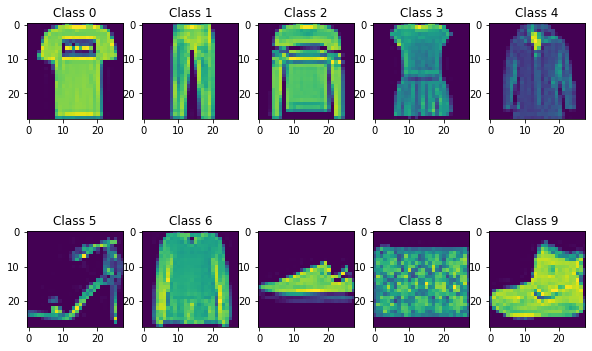

In [ ]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
ytrainUnique,uniqueIndex = np.unique(ytrain,return_index=True)
xtrainUnique = xtrain[uniqueIndex] 
fig = pyplot.figure(figsize=(10, 7));
for i,j in enumerate(uniqueIndex):
  fig.add_subplot(2, 5, i+1)
  plt.imshow(xtrainUnique[i])#cmap=plt.cm.binary
  plt.title("Class "+str(i))
plt.show()

In [ ]:
trainy.reshape(trainy.shape[0],1).shape

(60000, 1)

In [ ]:
[np.zeros((2,4)) for i in range(3)]

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])]